In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df  = pd.read_csv("data/data_prep.csv")
df.drop(columns=['student','lgain_pp', 'lgain_pe'], inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')
# Remove rows with NaN values
df = df.dropna()

# Carga el conjunto de datos
X = df.drop(columns=['take_exam'])
y = df.take_exam

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador Naive Bayes
clf = GaussianNB()

# Ajustar el clasificador utilizando los datos de entrenamiento
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la exactitud de las predicciones
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

Exactitud: 0.9921259842519685


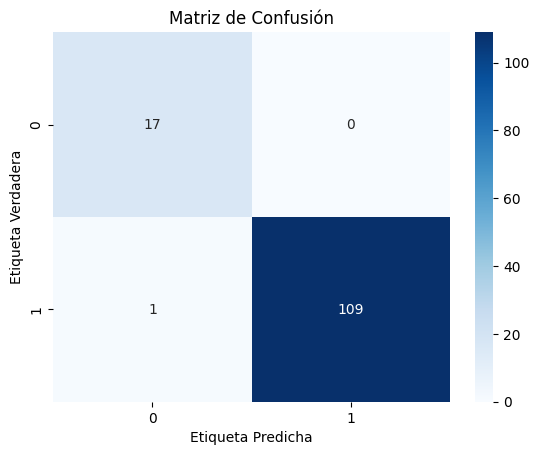

In [9]:
# Calcular la matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()